In [1]:
# load image
from func.utils import get_model_output_id_wnid_class_dict # get mapping: format: {"Model Ouput ID": ["WNID", "Class"]}
from func.utils import get_imagenet_id_wnid_class_dict # get mapping: format: {"ImageNet ID": ["WNID", "class"]}, e.g. {..."233": ['n02106382', 'Bouvier_des_Flandres'], ...}
from func.utils import map_model_id_to_imagenet_id, map_imagenet_id_to_model_id # mapping funcs
# load images from imagenet_sample_5000 (a sample dataset)
from func.utils import preprocess_image, get_img_names_and_labels_from_imagenet_sample, load_img_from_imagenet_sample_by_index, load_img_from_imagenet_sample_by_class
from func.utils import save_obj, load_obj

import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# get the dict of ImageNet ID, WNID and class name
# format: {"ImageNet ID": ["WNID", "class"]}, e.g. {..."233": ['n02106382', 'Bouvier_des_Flandres'], ...}
imagenet_id_label=get_imagenet_id_wnid_class_dict(matfilepath = "imagenet_info/ILSVRC2012_meta.mat")

# get the dict of model output ID, WNID and class name
# format: {"Model Ouput ID": ["WNID", "Class"]}
modeloutput_id_label=get_model_output_id_wnid_class_dict(jsonfilepath = "imagenet_info/imagenet_label_index.json")

# get dict map model output ID to ImageNet ID
map_dict_model2imagenet=map_model_id_to_imagenet_id(imagenet_id_label, modeloutput_id_label)

# get ImageNet ID to dict map model output ID
map_dict_imagenet2model=map_imagenet_id_to_model_id(imagenet_id_label, modeloutput_id_label)

### show imagenet classes

In [3]:
# only 1~1000 is valid
for idx in imagenet_id_label:
    print(str(idx)+": "+str(imagenet_id_label[idx]))

1: ['n02119789', 'kit fox, Vulpes macrotis']
2: ['n02100735', 'English setter']
3: ['n02110185', 'Siberian husky']
4: ['n02096294', 'Australian terrier']
5: ['n02102040', 'English springer, English springer spaniel']
6: ['n02066245', 'grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus']
7: ['n02509815', 'lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens']
8: ['n02124075', 'Egyptian cat']
9: ['n02417914', 'ibex, Capra ibex']
10: ['n02123394', 'Persian cat']
11: ['n02125311', 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor']
12: ['n02423022', 'gazelle']
13: ['n02346627', 'porcupine, hedgehog']
14: ['n02077923', 'sea lion']
15: ['n02110063', 'malamute, malemute, Alaskan malamute']
16: ['n02447366', 'badger']
17: ['n02109047', 'Great Dane']
18: ['n02089867', 'Walker hound, Walker foxhound']
19: ['n02102177', 'Welsh springer spaniel']
20: ['n02091134', 'whippet']
21: ['n02092002', 'Scottish deerhound, deerhound']
22: [

### load sample images

In [4]:
### path to the sample images
filepath_5000 = "/data/imagenet_sample_5000/imagenet_sample_5000"
###

There are 5000 imgs, and 1000 classes.
load img /data/imagenet_sample_5000/imagenet_sample_5000/3_n02110185_0.JPEG
ImageNet ID: 3
WNID and class: ['n02110185', 'Siberian husky']
Pic ID is 1665


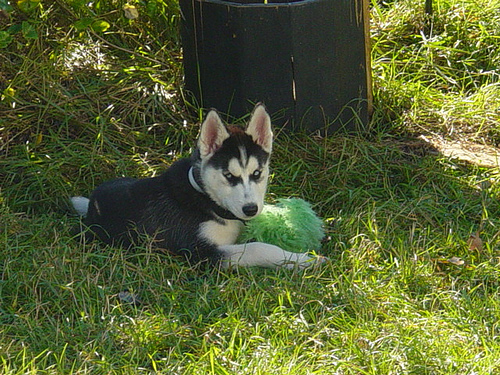

In [5]:
# input an ImageNet ID, 1~1000, indicating which class to load, we'll randomly choice one img in the class
img, pix_id, imagenet_id = load_img_from_imagenet_sample_by_class(3, imagenet_labels=imagenet_id_label,
                                                                  data_filepath = filepath_5000)
print("Pic ID is "+str(pix_id))
img

There are 5000 imgs, and 1000 classes.
load img /data/imagenet_sample_5000/imagenet_sample_5000/51_n02105162_3.JPEG
ImageNet ID: 51
WNID and class: ['n02105162', 'malinois']
Pic ID is 2333


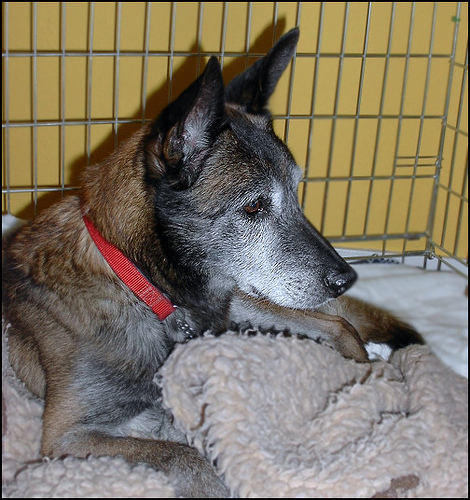

In [6]:
# input an index indicating which image file to load
img, pix_id, _ = load_img_from_imagenet_sample_by_index(2333, imagenet_labels=imagenet_id_label,
                                                        data_filepath = filepath_5000)
print("Pic ID is "+str(pix_id))
img

show preprocessed sample images

In [7]:
def get_preprocessed_image_and_correct_model_id_by_imagenet_id(imagenet_id,
                                                               imagenet_id_label=imagenet_id_label,
                                                               modeloutput_id_label=modeloutput_id_label,
                                                               data_filepath = filepath_5000):
    original_img, _, _ = load_img_from_imagenet_sample_by_class(imagenet_id, imagenet_labels=imagenet_id_label,
                                                                data_filepath = data_filepath)
    preprocessed_img_tensor, resized_img = preprocess_image(original_img)
    imagenet_wnid_and_class_name = imagenet_id_label[str(imagenet_id)]
    # get ImageNet ID to dict map model output ID
    map_dict_imagenet2model=map_imagenet_id_to_model_id(imagenet_id_label, modeloutput_id_label)
    correct_model_id = np.int(map_dict_imagenet2model[str(imagenet_id)])
    
    return (original_img, resized_img, preprocessed_img_tensor, correct_model_id, imagenet_wnid_and_class_name)

def get_preprocessed_image_and_correct_model_id_by_pic_index(pic_index,
                                                             imagenet_id_label=imagenet_id_label,
                                                             modeloutput_id_label=modeloutput_id_label,
                                                             data_filepath = filepath_5000):
    original_img, _, imagenet_id = load_img_from_imagenet_sample_by_index(pic_index, imagenet_labels=imagenet_id_label,
                                                                          data_filepath = data_filepath)
    preprocessed_img_tensor, resized_img = preprocess_image(original_img)
    imagenet_wnid_and_class_name = imagenet_id_label[str(imagenet_id)]
    # get ImageNet ID to dict map model output ID
    map_dict_imagenet2model=map_imagenet_id_to_model_id(imagenet_id_label, modeloutput_id_label)
    correct_model_id = np.int(map_dict_imagenet2model[str(imagenet_id)])
    
    return (original_img, resized_img, preprocessed_img_tensor, correct_model_id, imagenet_wnid_and_class_name)

There are 5000 imgs, and 1000 classes.
load img /data/imagenet_sample_5000/imagenet_sample_5000/389_n01534433_3.JPEG
ImageNet ID: 389
WNID and class: ['n01534433', 'junco, snowbird']
output model id is 13
correct model prediction is 13
correct imagenet id is 389
WNID and name are ['n01534433', 'junco, snowbird']
preprocessed tensor: shape: torch.Size([1, 3, 224, 224]); type: <class 'torch.Tensor'>


/tmp/ipykernel_1429/4150340515.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  correct_model_id = np.int(map_dict_imagenet2model[str(imagenet_id)])


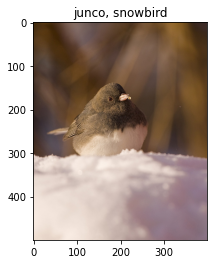

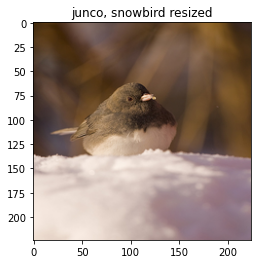

In [8]:
ID = 389

(original_img, resized_img, preprocessed_img_tensor, correct_model_id, imagenet_wnid_and_class_name)=\
get_preprocessed_image_and_correct_model_id_by_imagenet_id(ID)

plt.figure()
plt.title(imagenet_wnid_and_class_name[1])
plt.imshow(original_img)
plt.figure()
plt.title(imagenet_wnid_and_class_name[1]+" resized")
plt.imshow(resized_img)

print("output model id is "+str(correct_model_id))
print("correct model prediction is "+str(map_dict_imagenet2model[str(ID)]))
print("correct imagenet id is "+str(map_dict_model2imagenet[str(correct_model_id)]))
print("WNID and name are "+str(imagenet_wnid_and_class_name))
print("preprocessed tensor: shape: "+str(preprocessed_img_tensor.shape)+"; type: "+str(type(preprocessed_img_tensor)))

There are 5000 imgs, and 1000 classes.
load img /data/imagenet_sample_5000/imagenet_sample_5000/3_n02110185_4.JPEG
ImageNet ID: 3
WNID and class: ['n02110185', 'Siberian husky']
output model id is 250
correct imagenet id is 3
WNID and name are ['n02110185', 'Siberian husky']
preprocessed tensor: shape: torch.Size([1, 3, 224, 224]); type: <class 'torch.Tensor'>


/tmp/ipykernel_1429/4150340515.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  correct_model_id = np.int(map_dict_imagenet2model[str(imagenet_id)])


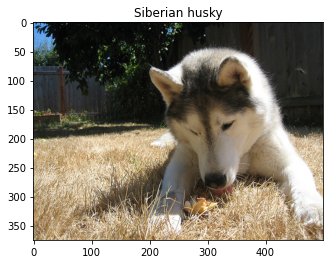

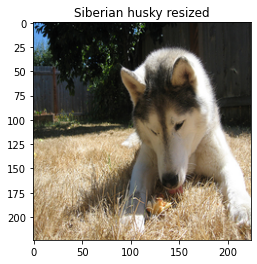

In [9]:
# test
pic_id = 1669
(original_img, resized_img, preprocessed_img_tensor, correct_model_id, imagenet_wnid_and_class_name)=\
get_preprocessed_image_and_correct_model_id_by_pic_index(pic_id)

plt.figure()
plt.title(imagenet_wnid_and_class_name[1])
plt.imshow(original_img)
plt.figure()
plt.title(imagenet_wnid_and_class_name[1]+" resized")
plt.imshow(resized_img)

print("output model id is "+str(correct_model_id))
print("correct imagenet id is "+str(map_dict_model2imagenet[str(correct_model_id)]))
print("WNID and name are "+str(imagenet_wnid_and_class_name))
print("preprocessed tensor: shape: "+str(preprocessed_img_tensor.shape)+"; type: "+str(type(preprocessed_img_tensor)))

### imagenet parent and child

In [10]:
imagenet_class_parent_and_child_dict = load_obj("imagenet_info/imagenet_class_dict")

In [11]:
# e.g.
imagenet_class_parent_and_child_dict[1095]

{'WNID': 'n00003553',
 'words': 'whole, unit',
 'gloss': 'an assemblage of parts that is regarded as a single entity; "how big is that part compared to the whole?"; "the team is a unit"',
 'num_children': 3,
 'children': array([1096, 1108, 1388], dtype=uint16),
 'wordnet_height': 16,
 'num_train_images': 0,
 'parent': array([1081], dtype=uint16)}